In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [63]:
datapath='/Users/soni6/github/soccer-analytics/data/archive/Datasets'
finalData=pd.read_csv(datapath+'/finalData.csv')
# finalData=finalData[finalData['FTR']!=0]
X=finalData.drop(columns=['FTR'])
y=finalData['FTR']
print(X.shape,finalData.columns)

(6383, 41) Index(['FTR', 'FTHG-H', 'FTAG-H', 'FTR-H', 'HTHG-H', 'HTAG-H', 'HTR-H', 'HS-H',
       'AS-H', 'HST-H', 'AST-H', 'HC-H', 'AC-H', 'HF-H', 'AF-H', 'HY-H',
       'AY-H', 'HR-H', 'AR-H', 'FTHG-A', 'FTAG-A', 'FTR-A', 'HTHG-A', 'HTAG-A',
       'HTR-A', 'HS-A', 'AS-A', 'HST-A', 'AST-A', 'HC-A', 'AC-A', 'HF-A',
       'AF-A', 'HY-A', 'AY-A', 'HR-A', 'AR-A', 'HomeForm', 'AwayForm',
       'PreviousEncounters', 'HomePreviousPosition', 'AwayPreviousPosition'],
      dtype='object')


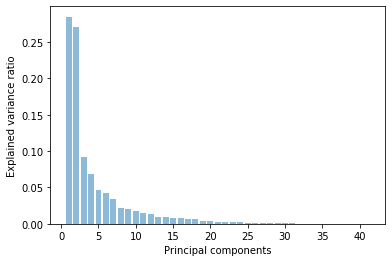

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,
                                                    random_state=1)
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
plt.bar(range(1, 42), pca.explained_variance_ratio_, alpha=0.5, align='center')
# plt.step(range(1, 110), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## SVM

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,
                                                    random_state=1)
# pca = PCA(n_components = 30)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.fit_transform(X_test)
# comment below if without PCA
# X_train=X_train_pca
# X_test=X_test_pca

svc=SVC(gamma='scale',C=10,kernel='poly')
svc.fit(X_train,y_train)
y_preds = svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
auc_roc = auc(fpr, tpr)
print("Testing set AUC",auc_roc)
# y_preds = clfSV.best_estimator_.predict_proba(X_train).T[1]
y_preds = svc.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_preds, pos_label=1)
auc_roc = auc(fpr, tpr)
print("Training set AUC",auc_roc)

Testing set AUC 0.6640928634357363
Training set AUC 0.7155212406522202


In [58]:
model_to_set = OneVsRestClassifier(SVC(gamma='scale'))
parameters = {
    "estimator__C": [0.1,1,100],
    "estimator__kernel": ["poly","rbf"],
}
t1=time.time()
clfSV = GridSearchCV(model_to_set,cv=3, param_grid=parameters)

clfSV.fit(X_train,y_train)
y_preds = clfSV.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
auc_roc = auc(fpr, tpr)
print("Testing set AUC",auc_roc)
# y_preds = clfSV.best_estimator_.predict_proba(X_train).T[1]
y_preds = clfSV.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_preds, pos_label=1)
auc_roc = auc(fpr, tpr)
print("Training set AUC",auc_roc)
t2=time.time()
print("Time to train", round(t2-t1,2))

Testing set AUC 0.6542403490617648
Training set AUC 0.684418252987061
Time to train 58.61


## k-means